# First look at using database to quickly graph potential metrics

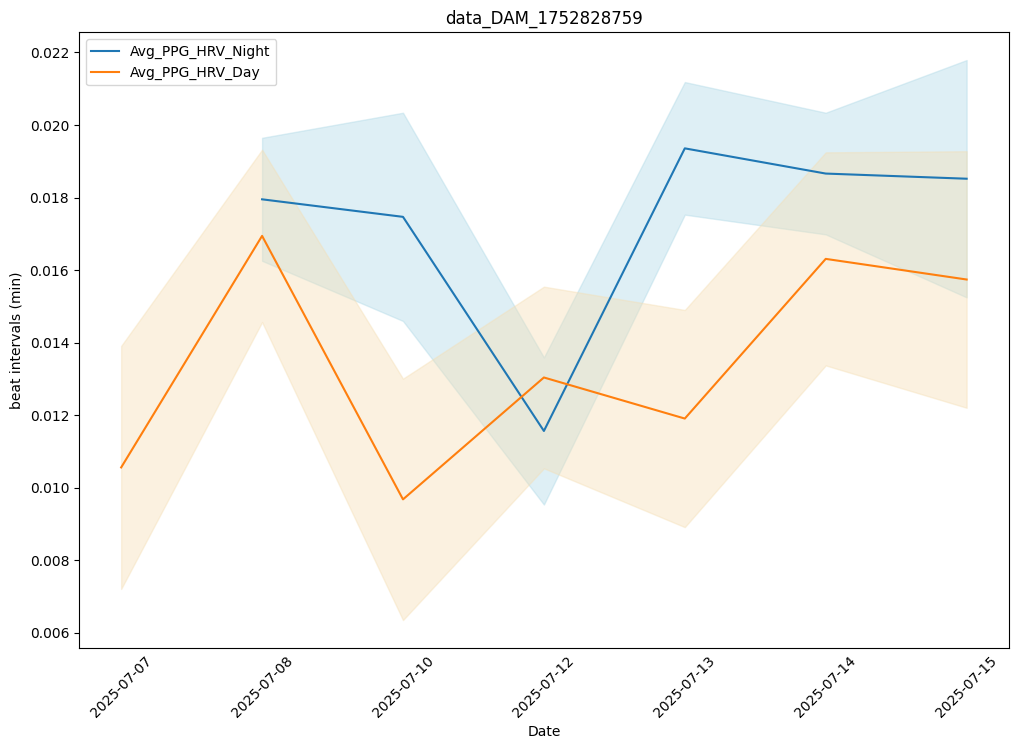

In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
db_name='volunteer_metrics.db'
patient_ID='data_DAM_1752828759'
con=sqlite3.connect(db_name)
cur=con.cursor()
test_data=cur.execute("SELECT Night_Vitals.Std_PPG_HRV_Night,Daily_Vitals.Std_PPG_HRV_Day,Night_Vitals.Avg_PPG_HRV_Night,Daily_Vitals.Avg_PPG_HRV_Day,\
    Daily_Vitals.Date FROM Daily_Vitals INNER JOIN Night_Vitals on Daily_Vitals.Date_Vitals=Night_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)

fig,ax=plt.subplots(figsize=(12,8))
df.plot(x=c[-1],y=c[2:-1],ax=ax,ylabel='beat intervals (min)',title=patient_ID)
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Night']-df['Std_PPG_HRV_Night'],y2=df['Avg_PPG_HRV_Night']+df['Std_PPG_HRV_Night'],alpha=0.4,color='lightblue')
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Day']-df['Std_PPG_HRV_Day'],y2=df['Avg_PPG_HRV_Day']+df['Std_PPG_HRV_Day'],alpha=0.4,color='wheat')
ax.tick_params(axis='x',labelrotation=45,length=0.1)

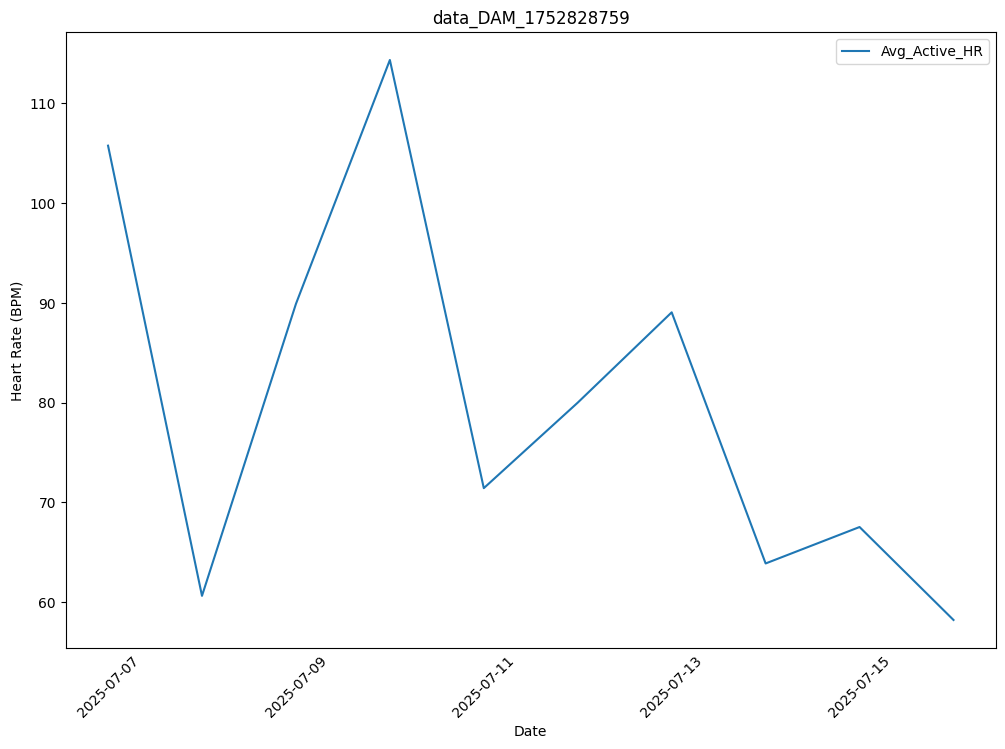

In [ ]:
cur=con.cursor()
test_data=cur.execute("SELECT Activities.Avg_Active_HR ,Daily_Vitals.Date FROM Activities INNER JOIN Daily_Vitals on\
                     Activities.Date_Vitals=Daily_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)
fig,ax=plt.subplots(figsize=(12,8))
df.plot(x=c[-1],y=c[:-1],ax=ax,ylabel='Heart Rate (BPM)',title=patient_ID)
ax.tick_params(axis='x',labelrotation=45,length=0.1)